# CPSC 302: Assignment 6
## Nicholas Hu

### Exercise 1

In [1]:
#= 
CPSC 302 Assignment 6
Nicholas Hu
=#

using Plots
pyplot()
using LaTeXStrings

In [2]:
# Tridiagonal system solver (Ax = b for A tridiagonal) without pivoting
#    
# Parameters: 4 vectors of size n or n-1 -- 
#             the subdiagonal (n-1), diagonal (n), superdiagonal (n-1), and 'b' vector (n)
#
# Returns:    1 vector of size n -- x = A^{-1} b

function trisolve{T<:Number}(dl::Vector{T}, d::Vector{T}, du::Vector{T}, b::Vector{T})::Vector{T}
    n = length(d)
    x = Vector{T}(n)
    
    # Row reduction
    for k = 1:n-1
        l = dl[k] / d[k]  # Multiplier
        d[k+1] = d[k+1] - l * du[k]
        b[k+1] = b[k+1] - l * b[k]
    end
    
    # Backward substitution
    x[n] = b[n] / d[n]
    for k = n-1:-1:1
        x[k] = (b[k] - du[k] * x[k+1]) / d[k]
    end
    
    return x
end;

In [3]:
n = 10
dl, d, du = Vector{Float64}(-1:-1:-(n-1)), Vector{Float64}(3:3:3n), Vector{Float64}(-2:-1:-n)

A, b = Tridiagonal(dl, d, du), vec(randn(n, 1))

x_julia = A \ b
x = trisolve(dl, d, du, b)

@printf("Norm of difference between solutions: %e", norm(x - x_julia))

Norm of difference between solutions: 0.000000e+00

### Exercise 2

In [4]:
g = t -> (pi / 2)^2 * sin((pi / 2) * t)

N = 100
h = (1 - 0) / N
t = linspace(0 + h, 1, N)
dl, d, du = [-vec(ones(N-2, 1)); -2], 2 * vec(ones(N)), -vec(ones(N-1, 1))

v = trisolve(dl / h^2, d / h^2, du / h^2, g(t))
u = sin((pi / 2) * t)

@printf("Infinity-norm of difference between solutions: %e", norm(v - u, Inf))

Infinity-norm of difference between solutions: 2.056193e-05

### Exercise 3

#### (a)

Ordinary least squares cannot be applied as the model $u(t) = \gamma_1 e^{\gamma_2 t}$ is not a linear combination of basis functions ($e^{\gamma_2 t}$ is not considered a basis function as it depends on $\gamma_2$).

#### (b)

In [5]:
t = [0.0, 1.0, 2.0]
z = exp([0.1, 0.9, 2])

x_1, x_2 = linreg(t, log(z))
latexstring("u(t) = ", exp(x_1), "e^{", x_2, "t}")

L"$u(t) = 1.0512710963760241e^{0.95t}$"

### Exercise 4

*We prove (b) first.*

#### (b)

Let $A = [\vec{a}_1 \cdots \vec{a}_n] \in \mathcal{M}_{m \times n}$ and let $A = Q_1 R_1$ denote the 'economy-size' QR decomposition of $A$ (i.e., $Q_1$ is $m \times n$, $R_1$ is $n \times n$).

If $\{\vec{e}_j\}_{j=1}^{n}$ is the orthonormal basis produced by the Gram-Schmidt process applied to $\{\vec{a}_j\}_{j=1}^{n}$ and $r_{ij} := \langle \vec{e}_i, \vec{a}_j \rangle$, then $\vec{a}_j = \left( \sum_{i=1}^{j-1} r_{ij} \vec{e}_i \right) + r_{jj} \vec{e}_j \implies \lvert r_{jj} \rvert = \left\lVert \vec{a}_j - \sum_{i=1}^{j-1} r_{ij} \vec{e}_i \right\rVert_2$. That is to say, $r_{jj} = 0$ if and only if $\vec{a}_j \in \mathrm{span} \{\vec{e}_i\}_{i=1}^{j-1} = \mathrm{span} \{\vec{a}_i\}_{i=1}^{j-1}$, since each step of the Gram-Schmidt process preserves span (note that the summation is an orthogonal projection onto one of these subspaces).

But the $r_{jj}$ are precisely the diagonal elements of $R_1$; taking the inverse of the statement above yields the conclusion.

#### (a)

The result follows from (b) after performing the block multiplication $A = \begin{bmatrix}Q_1 & Q_2\end{bmatrix} \begin{bmatrix}R_1 \\ 0\end{bmatrix} = Q_1 R_1$, where $Q_1, Q_2, R_1, 0$ are of dimensions $m \times n, m \times (m - n), n \times n$, and $(m - n) \times n$, respectively.

### Exercise 5

When $A$ is square, the hypothesis of the question reduces to the invertibility of $A$; hence $A^+ = (A^\top A)^{-1} A^\top = A^{-1} (A^\top)^{-1} A^\top = A^{-1}$.

If $A = QR$, 

\begin{align}
A^+ &= ((QR)^\top QR)^{-1} (QR)^\top \\
&= (R^\top Q^\top QR)^{-1} (QR)^\top \\
&= (R^\top R)^{-1} (QR)^\top && \text{$Q^\top Q = I$ since $Q$ has orthonormal columns} \\
&= R^{-1} (R^\top)^{-1} R^\top Q^\top \\
&= R^{-1} Q^\top.
\end{align}

If $A = U \Sigma V^\top$,

\begin{align}
A^+ &= ((U \Sigma V^\top)^\top U \Sigma V^\top)^{-1} (U \Sigma V^\top)^\top \\
&= (V \Sigma^\top U^\top U \Sigma V^\top)^{-1} (U \Sigma V^\top)^\top \\
&= (V \Sigma^\top \Sigma V^\top)^{-1} (U \Sigma V^\top)^\top && \text{$U^\top U = I$ since $U$ is orthogonal} \\
&= V (\Sigma^\top \Sigma)^{-1} V^{-1} V \Sigma^\top U^\top && \text{$(V^\top)^{-1} = V$ since $V$ is orthogonal} \\
&= V (\Sigma^\top \Sigma)^{-1} \Sigma^\top U^\top \\
(&= V \Sigma^+ U^\top).
\end{align}

### Exercise 6

#### (a)

The regularized least squares problem can be rewritten as 

$$\hat{x} = \arg\min_{\vec{x}} \lVert A \vec{x} - \vec{b} \rVert^2 + \lambda \lVert \vec{x} \rVert^2 = \arg\min_{\vec{x}} \left\lVert \begin{bmatrix}A \\ \sqrt{\lambda} I_n\end{bmatrix} \vec{x} - \begin{bmatrix} \vec{b} \\ \vec{0}_n\end{bmatrix} \right\rVert^2,$$

where $A, \vec{x}, \vec{b}$ are $m \times n$, $n \times 1$, and $m \times 1$, respectively. We observe that the problem has been reduced to an ordinary least squares problem 

$$\hat{x} = \arg\min_{\vec{x}} \left\lVert A' \vec{x} - \vec{b'} \right\rVert^2;\quad A' := \begin{bmatrix}A \\ \sqrt{\lambda} I_n\end{bmatrix}, \vec{b'} := \begin{bmatrix} \vec{b} \\ \vec{0}_n\end{bmatrix}.$$

Using the QR factorization of $A'$, $A' = QR$, the solution can be obtained by solving $R \hat{x} = Q^\top \vec{b'}$ for $\hat{x}$.

#### (b)


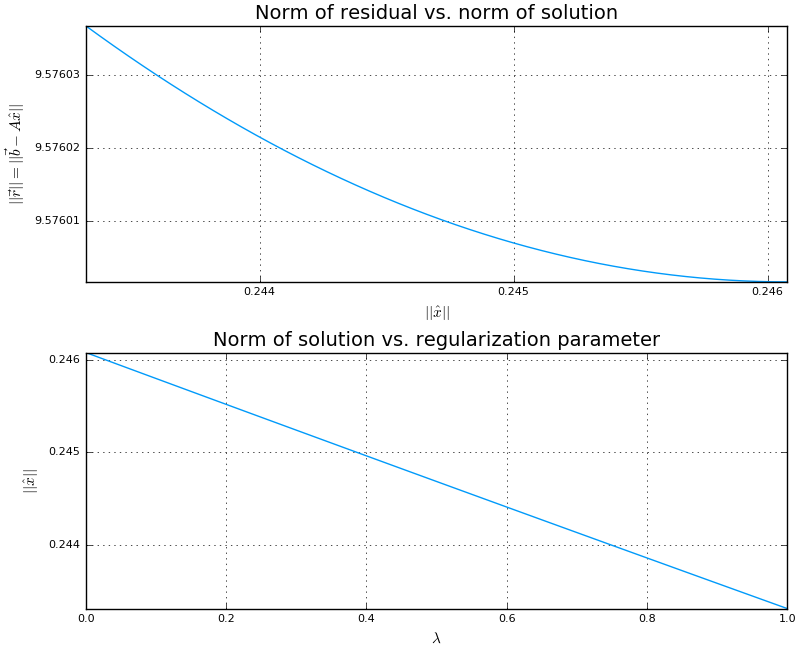

In [6]:
m, n = 100, 10
A, b = randn(m, n), randn(m, 1)

lambda = linspace(0, 1, 50)
norm_res, norm_sol = Vector{Float64}(50), Vector{Float64}(50)

for i = 1:50
    x = [A; sqrt(lambda[i]) * eye(n)] \ [b; zeros(n, 1)]
    norm_res[i], norm_sol[i] = norm(b - A*x), norm(x)
end

p1 = plot(norm_sol, norm_res, label="", 
          xlabel=L"||\hat{x}||", 
          ylabel=L"||\vec{r}|| = ||\vec{b} - A\hat{x}||",
          title="Norm of residual vs. norm of solution")
p2 = plot(lambda, norm_sol, label="",
          xlabel=L"\lambda", ylabel=L"||\hat{x}||",
          title="Norm of solution vs. regularization parameter")
plot(p1, p2, layout=(2, 1), size=(800, 650))